# 第８回目の着順予想
- 21/05/09に作成開始
- racerの情報に関して、racer idをdummy変数化したものだけをinputにしてみる

In [1]:
import pandas as pd

## 1. データ準備
### 1.1 データロード

In [10]:
race_df = pd.read_pickle('../../../data/arrangedData/race_df_w_stocastic_3.pkl').reset_index(drop=True)

# racer idを文字列にしておく
race_df["racer_ed"] = race_df["racer_id"].map(lambda x: str(x))

# 中身を確認
race_df

,date,venue,raceNumber,枠,racer_id,racer_class,racer_name,num_false_start,num_late_start,motorNo,...,exhibition_late,exhibition_st,weather_曇り,weather_雨,weather_雪,1着率,2着率,3着率,average_start_time,racer_ed
0,2020-10-01,三 国,1.0,1,4961,2,西橋 奈未,1,0,34,...,False,0.07,0,0,0,NaN,NaN,NaN,NaN,4961
1,2020-10-01,三 国,1.0,2,4071,3,古賀 千晶,1,0,52,...,False,0.21,0,0,0,NaN,NaN,NaN,NaN,4071
2,2020-10-01,三 国,1.0,3,4849,4,森田 太陽,0,0,26,...,False,0.30,0,0,0,NaN,NaN,NaN,NaN,4849
3,2020-10-01,三 国,1.0,4,4746,3,大豆生田 蒼,0,0,53,...,False,0.24,0,0,0,NaN,NaN,NaN,NaN,4746
4,2020-10-01,三 国,1.0,5,4987,3,島倉 都,0,0,35,...,False,0.19,0,0,0,NaN,NaN,NaN,NaN,4987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158977,2021-04-10,蒲 郡,12.0,2,4066,2,東本 勝利,0,0,20,...,False,0.04,0,0,0,0.117647,0.352941,0.176471,0.161176,4066
158978,2021-04-10,蒲 郡,12.0,3,4611,2,今井 美亜,0,0,68,...,False,0.06,0,0,0,0.190476,0.142857,0.142857,0.147143,4611
158979,2021-04-10,蒲 郡,12.0,4,3761,2,山本 光雄,0,0,27,...,False,0.01,0,0,0,0.052632,0.210526,0.157895,0.170526,3761
158980,2021-04-10,蒲 郡,12.0,5,3994,2,茶谷 桜,0,0,52,...,False,0.02,0,0,0,0.000000,0.000000,0.176471,0.181765,3994


### 1.2 1-6枠のデータを1行にまとめ, inputにできない列を一部削除

In [11]:
# レースごとに一つの情報しか持たない列と、枠番ごとに異なる情報をもつ列を分けて別のdfとする(date, venue, racenumberはindex的に用いる)
race_df_frame = race_df[['date', 'venue', 'raceNumber',
                         '枠', 'num_false_start', 'num_late_start',
                         'racer_id', 'ボート2連率', 'ボート3連率', 'モーター2連率', 'モーター3連率',
                         'exhibitionTime', 'exhibition_st', 'exhibition_cource', 'exhibition_flying',
                         'exhibition_late', 'tilt', 'weight', '着順'
                        ]].set_index(['date', 'venue', 'raceNumber'])

race_df_race = race_df[['date', 'venue', 'raceNumber',
       'temperature', 'water_temperature', 'wave_height',
                       'wind_speed', 'weather_曇り', 'weather_雨', 'weather_雪',
                      ]]
race_df_race.drop_duplicates(inplace=True)
race_df_race.set_index(['date', 'venue', 'raceNumber'], inplace=True)

# 枠番ごとに異なる情報をもつ列について、枠番ごとのdfに分類した後で行方向にconcat
race_df_frame_list = []
for frame in range(1, 7):
    # 枠番を列名の末尾に付与
    race_df_frame_ = race_df_frame[race_df_frame["枠"]==frame].add_suffix("_{0}".format(frame))
    race_df_frame_list.append(race_df_frame_)

race_df_merged = pd.concat(race_df_frame_list, axis=1)

# レースごとに一つの情報しか持たない列をマージ
race_df_merged = pd.concat([race_df_merged, race_df_race], axis=1)
race_df_merged

<ipython-input-11-78f9ee50aad2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_df_race.drop_duplicates(inplace=True)


枠_1  num_false_start_1  num_late_start_1  \
date       venue raceNumber                                             
2020-10-01 三　国   1.0           1                  1                 0   
                 2.0           1                  0                 0   
                 3.0           1                  0                 0   
                 5.0           1                  0                 0   
                 6.0           1                  1                 0   
...                          ...                ...               ...   
2021-04-10 蒲　郡   8.0           1                  0                 0   
                 9.0           1                  0                 0   
                 10.0          1                  0                 0   
                 11.0          1                  1                 0   
                 12.0          1                  1                 0   

                             racer_id_1  ボート2連率_1  ボート3連率_1  モーター2連率_1  \
date       venue raceNumber                                              
2020-10-01 三　国   1.0               4961     46.90     64.60      30.33   
                 2.0               4501     43.36     58.41      32.67   
                 3.0               3845     41.82     55.45      35.29   
                 5.0               5030     25.89     47.32      44.54   
                 6.0               4372     43.59     58.12      36.80   
...                                 ...       ...       ...        ...   
2021-04-10 蒲　郡   8.0               3994     29.38     49.48      31.03   
                 9.0               4061     28.74     41.38      38.46   
                 10.0              4086     32.31     49.34      29.47   
                 11.0              4362     34.78     48.31      36.41   
                 12.0              3713     29.41     48.24      35.68   

                             モーター3連率_1  exhibitionTime_1  exhibition_st_1  \
date       venue raceNumber                                                 
2020-10-01 三　国   1.0             54.10              6.67             0.07   
                 2.0             42.57              6.65             0.11   
                 3.0             52.94              6.68             0.18   
                 5.0             54.62              6.67             0.06   
                 6.0             50.40              6.78             0.08   
...                                ...               ...              ...   
2021-04-10 蒲　郡   8.0             50.00              6.70             0.02   
                 9.0             54.95              6.71             0.01   
                 10.0            46.86              6.75             0.01   
                 11.0            55.90              6.75             0.18   
                 12.0            53.52              6.76             0.09   

                             ...  tilt_6  weight_6  着順_6  temperature  \
date       venue raceNumber  ...                                        
2020-10-01 三　国   1.0         ...    -0.5      48.3     5         22.0   
                 2.0         ...    -0.5      46.0     5         20.0   
                 3.0         ...    -0.5      47.2     5         21.0   
                 5.0         ...    -0.5      47.3     4         22.0   
                 6.0         ...    -0.5      47.1     6         22.0   
...                          ...     ...       ...   ...          ...   
2021-04-10 蒲　郡   8.0         ...    -0.5      51.5     4         14.0   
                 9.0         ...    -0.5      50.5     4         13.0   
                 10.0        ...    -0.5      51.5     6         13.0   
                 11.0        ...    -0.5      56.1     6         13.0   
                 12.0        ...    -0.5      54.6     5         13.0   

                             water_temperature  wave_height  wind_speed  \
date       venue raceNumber                                               
2020-10-01 三　国

### 1.3 racer idのカラムをダミー変数化

In [17]:
race_df_merged = pd.get_dummies(race_df_merged, columns=["racer_id_{0}".format(i) for i in range(1, 7)])
race_df_merged

枠_1  num_false_start_1  num_late_start_1  \
date       venue raceNumber                                             
2020-10-01 三　国   1.0           1                  1                 0   
                 2.0           1                  0                 0   
                 3.0           1                  0                 0   
                 5.0           1                  0                 0   
                 6.0           1                  1                 0   
...                          ...                ...               ...   
2021-04-10 蒲　郡   8.0           1                  0                 0   
                 9.0           1                  0                 0   
                 10.0          1                  0                 0   
                 11.0          1                  1                 0   
                 12.0          1                  1                 0   

                             ボート2連率_1  ボート3連率_1  モーター2連率_1  モーター3連率_1  \
date       venue raceNumber                                             
2020-10-01 三　国   1.0            46.90     64.60      30.33      54.10   
                 2.0            43.36     58.41      32.67      42.57   
                 3.0            41.82     55.45      35.29      52.94   
                 5.0            25.89     47.32      44.54      54.62   
                 6.0            43.59     58.12      36.80      50.40   
...                               ...       ...        ...        ...   
2021-04-10 蒲　郡   8.0            29.38     49.48      31.03      50.00   
                 9.0            28.74     41.38      38.46      54.95   
                 10.0           32.31     49.34      29.47      46.86   
                 11.0           34.78     48.31      36.41      55.90   
                 12.0           29.41     48.24      35.68      53.52   

                             exhibitionTime_1  exhibition_st_1  \
date       venue raceNumber                                      
2020-10-01 三　国   1.0                     6.67             0.07   
                 2.0                     6.65             0.11   
                 3.0                     6.68             0.18   
                 5.0                     6.67             0.06   
                 6.0                     6.78             0.08   
...                                       ...              ...   
2021-04-10 蒲　郡   8.0                     6.70             0.02   
                 9.0                     6.71             0.01   
                 10.0                    6.75             0.01   
                 11.0                    6.75             0.18   
                 12.0                    6.76             0.09   

                             exhibition_cource_1  ...  racer_id_6_5166  \
date       venue raceNumber                       ...                    
2020-10-01 三　国   1.0                         1.0  ...                0   
                 2.0                         1.0  ...                0   
                 3.0                         1.0  ...                0   
                 5.0                         1.0  ...                0   
                 6.0                         1.0  ...                0   
...                                          ...  ...              ...   
2021-04-10 蒲　郡   8.0                         1.0  ...                0   
                 9.0                         1.0  ...                0   
                 10.0                        1.0  ...                0   
                 11.0                        1.0  ...                0   
                 12.0                        1.0  ...                0   

                             racer_id_6_5167  racer_id_6_5168  \
date       venue raceNumber                                     
2020-10-01 三　国   1.0                       0                0   
                 2.0                       0                0   
                 3.0                       0   

### 1.4 rank列を作成し、inputにできない列を削除
- 1枠： 1着ならば1, そうでなければ0

In [26]:
# 1枠は1着ならば1, そうでなければ0
race_df_merged.loc[race_df_merged["着順_1"] == 1, "rank_1"] = 1
race_df_merged.loc[race_df_merged["着順_1"] > 1, "rank_1"] = 0

race_df_merged.reset_index(inplace=True)

# inputにできない列を削除
drop_columns = ["着順_{0}".format(i) for i in range(1, 7)] + ["枠_{0}".format(i) for i in range(1, 7)] + ["date", "venue", "raceNumber"]
race_df_merged_for_analyze = race_df_merged.drop(drop_columns, axis=1)

In [19]:
race_df_merged

,date,venue,raceNumber,枠_1,num_false_start_1,num_late_start_1,ボート2連率_1,ボート3連率_1,モーター2連率_1,モーター3連率_1,...,racer_id_6_5167,racer_id_6_5168,racer_id_6_5169,racer_id_6_5170,racer_id_6_5171,racer_id_6_5172,racer_id_6_5173,racer_id_6_5174,racer_id_6_5175,rank_1
0,2020-10-01,三 国,1.0,1,1,0,46.90,64.60,30.33,54.10,...,0,0,0,0,0,0,0,0,0,1.0
1,2020-10-01,三 国,2.0,1,0,0,43.36,58.41,32.67,42.57,...,0,0,0,0,0,0,0,0,0,1.0
2,2020-10-01,三 国,3.0,1,0,0,41.82,55.45,35.29,52.94,...,0,0,0,0,0,0,0,0,0,0.0
3,2020-10-01,三 国,5.0,1,0,0,25.89,47.32,44.54,54.62,...,0,0,0,0,0,0,0,0,0,0.0
4,2020-10-01,三 国,6.0,1,1,0,43.59,58.12,36.80,50.40,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26492,2021-04-10,蒲 郡,8.0,1,0,0,29.38,49.48,31.03,50.00,...,0,0,0,0,0,0,0,0,0,0.0
26493,2021-04-10,蒲 郡,9.0,1,0,0,28.74,41.38,38.46,54.95,...,0,0,0,0,0,0,0,0,0,1.0
26494,2021-04-10,蒲 郡,10.0,1,0,0,32.31,49.34,29.47,46.86,...,0,0,0,0,0,0,0,0,0,1.0
26495,2021-04-10,蒲 郡,11.0,1,1,0,34.78,48.31,36.41,55.90,...,0,0,0,0,0,0,0,0,0,1.0


In [20]:
race_df_merged_for_analyze

,num_false_start_1,num_late_start_1,ボート2連率_1,ボート3連率_1,モーター2連率_1,モーター3連率_1,exhibitionTime_1,exhibition_st_1,exhibition_cource_1,exhibition_flying_1,...,racer_id_6_5167,racer_id_6_5168,racer_id_6_5169,racer_id_6_5170,racer_id_6_5171,racer_id_6_5172,racer_id_6_5173,racer_id_6_5174,racer_id_6_5175,rank_1
0,1,0,46.90,64.60,30.33,54.10,6.67,0.07,1.0,False,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0,43.36,58.41,32.67,42.57,6.65,0.11,1.0,False,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0,41.82,55.45,35.29,52.94,6.68,0.18,1.0,False,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,25.89,47.32,44.54,54.62,6.67,0.06,1.0,True,...,0,0,0,0,0,0,0,0,0,0.0
4,1,0,43.59,58.12,36.80,50.40,6.78,0.08,1.0,True,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26492,0,0,29.38,49.48,31.03,50.00,6.70,0.02,1.0,False,...,0,0,0,0,0,0,0,0,0,0.0
26493,0,0,28.74,41.38,38.46,54.95,6.71,0.01,1.0,True,...,0,0,0,0,0,0,0,0,0,1.0
26494,0,0,32.31,49.34,29.47,46.86,6.75,0.01,1.0,True,...,0,0,0,0,0,0,0,0,0,1.0
26495,1,0,34.78,48.31,36.41,55.90,6.75,0.18,1.0,True,...,0,0,0,0,0,0,0,0,0,1.0


### 1.6 training dataとtest dataに分ける

In [28]:
from sklearn.model_selection import train_test_split

X = race_df_merged_for_analyze.drop("rank_1", axis=1)
y = race_df_merged_for_analyze["rank_1"]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)

## 2. 回帰分析
### 2.1 Logistic回帰

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
model_lr.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

/Users/grice/opt/anaconda3/envs/boatrace2/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 性能評価

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred_lr = model_lr.predict(X_test)

print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred_lr))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred_lr))
print('precision = ', precision_score(y_true=y_test, y_pred=y_pred_lr))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred_lr))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred_lr))

confusion matrix = 
 [[ 299 3159]
 [ 321 4171]]
accuracy =  0.5622641509433962
precision =  0.569031377899045
recall =  0.928539626001781
f1 score =  0.7056335645406867


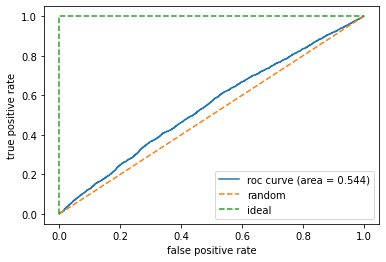

In [31]:
%matplotlib inline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score_lr = model_lr.predict_proba(X_test)[:, 1] # 検証データがクラス1に属する確率
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score_lr)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

#### 回帰係数を表示

In [32]:
pd.Series(model_lr.coef_[0], index=X_train.columns).sort_values()

wave_height           -0.031963
wind_speed            -0.025028
weight_1              -0.024242
exhibition_cource_3   -0.009823
モーター3連率_3             -0.007292
                         ...   
ボート2連率_1               0.007566
weight_4               0.008090
weight_2               0.012950
weight_3               0.013008
exhibition_cource_6    0.019850
Length: 9260, dtype: float64

### 2.2 RandomForest Classification

In [33]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=100)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

#### 性能評価

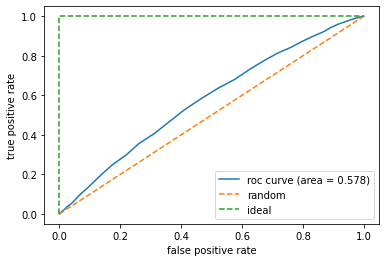

In [34]:
y_score_rf = model_rf.predict_proba(X_test)[:, 1] # 検証データがクラス1に属する確率
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score_rf)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [35]:
# 過学習の確認用
from sklearn.metrics import roc_auc_score

print('auc = ', roc_auc_score(y_true=y_train, y_score=model_rf.predict_proba(X_train)[:, 1] ))

auc =  0.9999999999999999


#### パラメータ調整

In [36]:
rf_params = {
    "min_samples_split": 600,
    "max_depth": 6,
    "n_estimators": 60,
    "random_state": 100
}
# "criterion": "entropy",
# "class_weight": "balanced",

model_rf = RandomForestClassifier(**rf_params)
model_rf.fit(X_train, y_train)

print('auc_train = ', roc_auc_score(y_true=y_train, y_score=model_rf.predict_proba(X_train)[:, 1]))
print('auc_test = ', roc_auc_score(y_true=y_test, y_score=model_rf.predict_proba(X_test)[:, 1]))

auc_train =  0.6521192920532044
auc_test =  0.5778416819155912


#### 回帰係数的なものを算出

In [37]:
pd.DataFrame({"features": X_train.columns, "importance": model_rf.feature_importances_}).sort_values("importance", ascending=False)

,features,importance
9,exhibition_cource_1,0.049313
48,exhibition_cource_4,0.030748
74,exhibition_cource_6,0.029718
35,exhibition_cource_3,0.027366
8,exhibition_st_1,0.026996
...,...,...
3209,racer_id_3_3434,0.000000
3208,racer_id_3_3433,0.000000
3207,racer_id_3_3432,0.000000
3206,racer_id_3_3430,0.000000


### 2.3 勾配ブースティング木

In [38]:
import lightgbm as lgb
import pickle

params = {"num_leaves": 2,
          "n_estimators": 50,
          "class_weight": "balanced",
          "random_state": 100
         }
# "min_data_in_leaf": 

model_lgb = lgb.LGBMClassifier(**params)
model_lgb.fit(X_train, y_train)

print('auc_train = ', roc_auc_score(y_true=y_train, y_score=model_lgb.predict_proba(X_train)[:, 1]))
print('auc_test = ', roc_auc_score(y_true=y_test, y_score=model_lgb.predict_proba(X_test)[:, 1]))

y_pred_lgb = model_lgb.predict(X_test)
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred_lgb))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred_lgb))
print('precision = ', precision_score(y_true=y_test, y_pred=y_pred_lgb))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred_lgb))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred_lgb))

auc_train =  0.591332473993099
auc_test =  0.5756469505327123
confusion matrix = 
 [[1558 1900]
 [1532 2960]]
accuracy =  0.5683018867924529
precision =  0.6090534979423868
recall =  0.6589492430988424
f1 score =  0.6330196749358425


#### 回帰係数的な

In [39]:
pd.DataFrame({"features": X_train.columns, "importance": model_lgb.feature_importances_}).sort_values("importance", ascending=False)

,features,importance
13,weight_1,16
8,exhibition_st_1,8
35,exhibition_cource_3,6
9,exhibition_cource_1,6
7,exhibitionTime_1,5
...,...,...
3095,racer_id_3_3081,0
3096,racer_id_3_3105,0
3097,racer_id_3_3107,0
3098,racer_id_3_3108,0


#### 学習曲線

In [40]:
import numpy as np
from sklearn.model_selection import learning_curve

# サンプル数300刻みで検証する
train_sizes = np.arange(300, len(X_train), 300)

train_sizes, train_scores, test_scores = learning_curve(
    model_lgb, X, y, train_sizes=train_sizes, random_state=100, shuffle=False
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

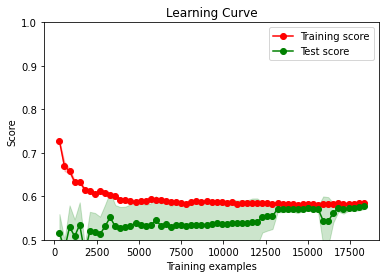

In [41]:
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

# Traing score と Test score をプロット
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")

# 標準偏差の範囲を色付け
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="r", alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="g", alpha=0.2)

plt.ylim(0.5, 1)
plt.legend(loc="best")

plt.show()

## 3. 回収率計算に用いるため、Light GBMの予測結果をdfにして出力

In [42]:
# 3.1 merged_dfをトレーニングデータ・テストデータと同じようにsplitし、indexを作成する
for_index_df = train_test_split(race_df_merged, shuffle=False, test_size=0.3)
output_df_train = for_index_df[0][["date", "venue", "raceNumber"]]
output_df_test = for_index_df[1][["date", "venue", "raceNumber"]]

# 3.2 Light GBMの予測結果をそれぞれ格納
output_df_train["predict_proba_frame_1"] = model_lgb.predict_proba(X_train)[:, 1]
output_df_test["predict_proba_frame_1"] = model_lgb.predict_proba(X_test)[:, 1]

<ipython-input-42-4919f2c81c82>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df_train["predict_proba_frame_1"] = model_lgb.predict_proba(X_train)[:, 1]
<ipython-input-42-4919f2c81c82>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df_test["predict_proba_frame_1"] = model_lgb.predict_proba(X_test)[:, 1]


In [43]:
# 確認用
output_df_train

,date,venue,raceNumber,predict_proba_frame_1
0,2020-10-01,三 国,1.0,0.494982
1,2020-10-01,三 国,2.0,0.495136
2,2020-10-01,三 国,3.0,0.489748
3,2020-10-01,三 国,5.0,0.502732
4,2020-10-01,三 国,6.0,0.484966
...,...,...,...,...
18542,2021-02-13,福 岡,9.0,0.442910
18543,2021-02-13,福 岡,11.0,0.508699
18544,2021-02-13,福 岡,12.0,0.521517
18545,2021-02-13,若 松,1.0,0.445407


In [29]:
# 3.3 pickleファイルにして出力
output_df_train.to_pickle('predict_proba_train_frame_1.pkl')
output_df_test.to_pickle('predict_proba_test_frame_1.pkl')